In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mammographic-mass-data-set/Cleaned_data.csv


In [12]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [13]:
df = pd.read_csv("/kaggle/input/mammographic-mass-data-set/Cleaned_data.csv")


In [14]:
x = df.drop(['Severity'], axis=1)
y = df[['Severity']]

In [15]:

dtc = DecisionTreeClassifier()

scores = cross_val_score(dtc, x, y, cv=10)

precision_scores = []
recall_scores = []
specificity_scores = []
f1_scores = []
accuracy_scores = []

for fold in range(10):
    trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2)
    
    dtc.fit(trainX, trainY)
    
    y_predicted = dtc.predict(testX)
    
    precision = precision_score(testY, y_predicted)
    recall = recall_score(testY, y_predicted)
    tn, fp, fn, tp = confusion_matrix(testY, y_predicted).ravel()
    specificity = tn / (fp + tn)
    f1 = f1_score(testY, y_predicted)
    accuracy = accuracy_score(testY, y_predicted)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    specificity_scores.append(specificity)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_specificity = np.mean(specificity_scores)
mean_f1 = np.mean(f1_scores)
mean_accuracy = np.mean(accuracy_scores)

print("Accuracy:{:.2f}".format(mean_accuracy))
print("Precision: {:.2f}".format(mean_precision))
print("Recall: {:.2f}".format(mean_recall))
print("Specificity:{:.2f}".format(mean_specificity))
print("F1 score: {:.2f}".format(mean_f1))


Accuracy:0.77
Precision: 0.79
Recall: 0.71
Specificity:0.82
F1 score: 0.75


In [16]:
svm = SVC(kernel='linear')

scores = cross_val_score(svm, x, y.values.ravel(), cv=10)

precision_scores = []
recall_scores = []
specificity_scores = []
f1_scores = []
accuracy_scores = []

for fold in range(10):
    trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2)
    
    svm.fit(trainX, trainY.values.ravel())
    
    y_predicted = svm.predict(testX)
    
    precision = precision_score(testY, y_predicted)
    recall = recall_score(testY, y_predicted)
    tn, fp, fn, tp = confusion_matrix(testY, y_predicted).ravel()
    specificity = tn / (fp + tn)
    f1 = f1_score(testY, y_predicted)
    accuracy = accuracy_score(testY, y_predicted)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    specificity_scores.append(specificity)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_specificity = np.mean(specificity_scores)
mean_f1 = np.mean(f1_scores)
mean_accuracy = np.mean(accuracy_scores)

print("Accuracy:{:.2f}".format(mean_accuracy))
print("Precision: {:.2f}".format(mean_precision))
print("Recall: {:.2f}".format(mean_recall))
print("Specificity:{:.2f}".format(mean_specificity))
print("F1 score: {:.2f}".format(mean_f1))


Accuracy:0.83
Precision: 0.87
Recall: 0.79
Specificity:0.88
F1 score: 0.82


In [17]:
knn_clf = KNeighborsClassifier()
y_pred = cross_val_predict(knn_clf, x, y.values.ravel(), cv=10)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='macro')
recall = recall_score(y, y_pred, average='macro')
f1 = f1_score(y, y_pred, average='macro')
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
specificity = tn / (tn + fp)

print("Accuracy:{:.2f}".format(mean_accuracy))
print("Precision: {:.2f}".format(mean_precision))
print("Recall: {:.2f}".format(mean_recall))
print("Specificity:{:.2f}".format(mean_specificity))
print("F1 score: {:.2f}".format(mean_f1))


Accuracy:0.83
Precision: 0.87
Recall: 0.79
Specificity:0.88
F1 score: 0.82


In [18]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, x, y.values.ravel(), cv=10)

rf.fit(x, y.values.ravel())

y_pred = rf.predict(testX)

# Compute evaluation metrics
accuracy = accuracy_score(testY, y_pred)
precision = precision_score(testY, y_pred, average='macro')
recall = recall_score(testY, y_pred, average='macro')
f1 = f1_score(testY, y_pred, average='macro')
tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
specificity = tn / (tn + fp)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Specificity: {:.2f}".format(specificity))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
Specificity: 0.95
F1-score: 0.95


In [19]:
nb = GaussianNB()

scores = cross_val_score(nb, x, y.values.ravel(), cv=10)


nb.fit(x, y.values.ravel())

y_pred = nb.predict(testX)

# Compute evaluation metrics
accuracy = accuracy_score(testY, y_pred)
precision = precision_score(testY, y_pred, average='macro')
recall = recall_score(testY, y_pred, average='macro')
f1 = f1_score(testY, y_pred, average='macro')
tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
specificity = tn / (tn + fp)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Specificity: {:.2f}".format(specificity))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
Specificity: 0.83
F1-score: 0.84


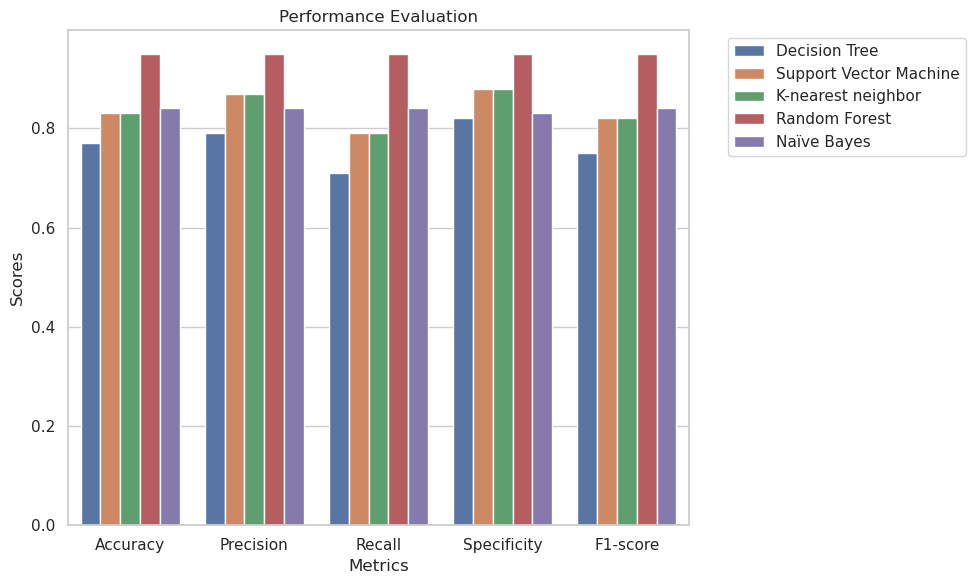

In [21]:
def plot_performance_results(methods, accuracy_scores, precision_scores, recall_scores, specificity_scores, f1_scores):
    data = pd.DataFrame({'Method': methods, 'Accuracy': accuracy_scores, 'Precision': precision_scores,
                         'Recall': recall_scores, 'Specificity': specificity_scores, 'F1-score': f1_scores})

    melted_data = pd.melt(data, id_vars='Method', var_name='Metric', value_name='Score')

    sns.set(style='whitegrid')

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metric', y='Score', hue='Method', data=melted_data)
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title('Performance Evaluation')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


methods = ['Decision Tree', 'Support Vector Machine', 'K-nearest neighbor', 'Random Forest', 'Naïve Bayes']
accuracy_scores = [0.77, 0.83, 0.83, 0.95, 0.84]
precision_scores = [0.79, 0.87, 0.87, 0.95, 0.84]
recall_scores = [0.71, 0.79, 0.79, 0.95, 0.84]
specificity_scores = [0.82, 0.88, 0.88, 0.95, 0.83]
f1_scores = [0.75, 0.82, 0.82, 0.95, 0.84]

plot_performance_results(methods, accuracy_scores, precision_scores, recall_scores, specificity_scores, f1_scores)
